In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import colors

from sklearn.datasets import make_blobs
%matplotlib inline

np.random.seed(3)



[]

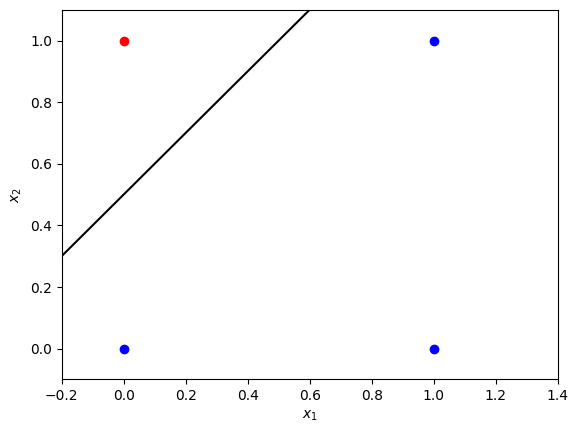

In [2]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()

In [3]:
m = 30 

X =  np.random.randint(0,2,(2,m))

Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1,m))


print('Training dataset X containing (x1, x2) coordinates in the columns:')
print(X)
print('Training dataset Y containing labels of two classes (0: blue, 1: red)')
print(Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (X.shape[1]))

Training dataset X containing (x1, x2) coordinates in the columns:
[[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]]
Training dataset Y containing labels of two classes (0: blue, 1: red)
[[0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0]]
The shape of X is: (2, 30)
The shape of Y is: (1, 30)
I have m = 30 training examples!


In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


In [6]:
print(sigmoid(np.array([1,2,3])))

[0.73105858 0.88079708 0.95257413]


In [7]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return n_x , n_y
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the output layer is: n_y = 1


In [8]:
def initialize_parameters(n_x,n_y):
    W = np.random.rand(n_y,n_x)*0.01
    b = np.zeros((n_y,1))

    parameters = {
        'W':W,
        'b':b
    }

    return parameters
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.00975995 0.00672384]]
b = [[0.]]


In [10]:
def forward_propagation(X,parameters):
    W = parameters["W"]
    b = parameters["b"]

    Z = np.matmul(W,X) + b

    A = sigmoid(Z)

    return A 

A = forward_propagation(X, parameters)

print("Output vector A:", A) 

Output vector A: [[0.5        0.50168095 0.50243997 0.50412085 0.50168095 0.5
  0.50168095 0.50243997 0.50243997 0.50412085 0.50168095 0.50243997
  0.50243997 0.50412085 0.5        0.50412085 0.50243997 0.50168095
  0.50168095 0.50168095 0.50168095 0.50243997 0.50412085 0.5
  0.5        0.50168095 0.50412085 0.50168095 0.5        0.5       ]]


In [11]:
def compute_cost(A, Y):
    m = Y.shape[1]
    logprobs = - np.multiply(np.log(A),Y) - np.multiply(np.log(1-A),(1-Y))
    cost = (1/m) * np.sum(logprobs)

    return cost 
print("cost = " + str(compute_cost(A, Y)))

cost = 0.6948250363871487


In [12]:
def backward_propagation(A,X,Y):
    m = Y.shape[1]
    diff = A-Y
    dldw = (1/m)*np.dot(diff,X.T)
    dldb =  np.sum(diff, axis = 1, keepdims = True)

    grads = {
        'dldw':dldw,
        'dldb':dldb
    }

    return grads
grads = backward_propagation(A, X, Y)

print("dW = " + str(grads["dldw"]))
print("db = " + str(grads["dldb"]))


dW = [[ 0.21806016 -0.06528218]]
db = [[5.05861444]]


In [14]:
def update_parameters(parameters,grads,learning_rate= 1.2):
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dldw"]
    db = grads["dldb"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[-0.25191224  0.08506245]]
b updated = [[-6.07033733]]


In [17]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A".
        A = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A, Y". Outputs: "cost".
        cost = compute_cost(A, Y)
        
        # Backpropagation. Inputs: "A, X, Y". Outputs: "grads".
        grads = backward_propagation(A, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters


In [18]:
parameters = nn_model(X, Y, num_iterations=50, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

Cost after iteration 0: 0.694552
Cost after iteration 1: 1.998589
Cost after iteration 2: 3.887041
Cost after iteration 3: 5.938148
Cost after iteration 4: 1.807502
Cost after iteration 5: 3.771942
Cost after iteration 6: 5.749148
Cost after iteration 7: 1.619552
Cost after iteration 8: 3.640211
Cost after iteration 9: 5.562050
Cost after iteration 10: 1.434363
Cost after iteration 11: 3.486471
Cost after iteration 12: 5.375416
Cost after iteration 13: 1.251095
Cost after iteration 14: 3.301682
Cost after iteration 15: 5.183744
Cost after iteration 16: 1.065484
Cost after iteration 17: 3.073084
Cost after iteration 18: 4.969676
Cost after iteration 19: 0.863640
Cost after iteration 20: 2.771029
Cost after iteration 21: 4.684888
Cost after iteration 22: 0.611591
Cost after iteration 23: 2.252644
Cost after iteration 24: 4.138445
Cost after iteration 25: 0.239197
Cost after iteration 26: 0.780115
Cost after iteration 27: 2.503400
Cost after iteration 28: 0.358874
Cost after iteration 29:

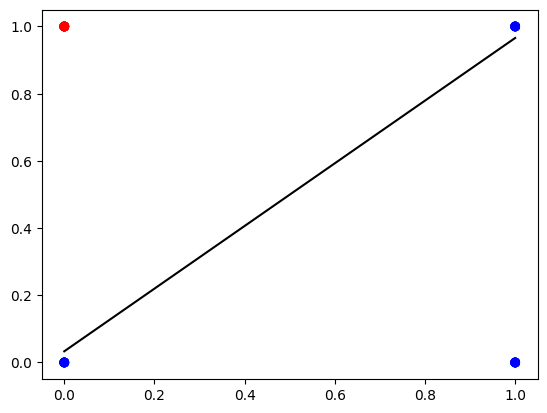

In [19]:
def plot_decision_boundary(X, Y, parameters):
    W = parameters["W"]
    b = parameters["b"]

    fig, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));
    
    x_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
    ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")
    plt.plot()
    plt.show()
    
plot_decision_boundary(X, Y, parameters)

In [20]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (blue: False / red: True)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A = forward_propagation(X, parameters)
    predictions = A > 0.5
    
    return predictions

X_pred = np.array([[1, 1, 0, 0],
                   [0, 1, 0, 1]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[1 1 0 0]
 [0 1 0 1]]
Predictions:
[[False  True False  True]]
